In [1]:
import re
import matplotlib.pyplot as plt
from ase.io import read
import numpy as np

# Function to read XYZ file and extract energy levels
def read_xyz_and_extract_energies(filename):
    with open(filename, 'r') as f:
        data = f.read()

    # Extract energy levels using regex
    energy_pattern = r'REF\d+_energy=([+-]?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)'
    energies = re.findall(energy_pattern, data)

    # Convert energies to float
    energies = list(map(float, energies))



    return energies

def read_xyz_and_extract_mace_energies(dat):
    with open(dat, 'r') as d:
        data = d.read()

    # Extract energy levels using regex
    mace_energy_pattern = r'MACE\d+_energy=([+-]?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)'
    mace_energies = re.findall(mace_energy_pattern, data)

    # Convert energies to float
    mace_energies = list(map(float, mace_energies))
    

    return mace_energies

# Replace 'your_data.xyz' with your actual file path
filename = 'rxn_data_PBE0.xyz'
energies = read_xyz_and_extract_energies(filename)


range(0, 104)


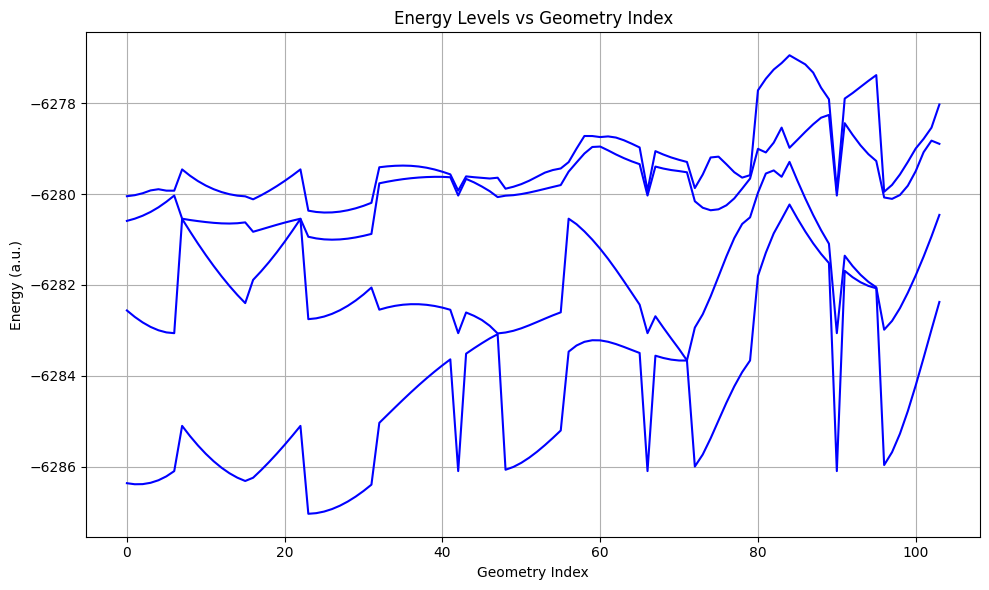

In [2]:
# Plotting rxn coords

eng = np.array(energies).reshape([-1,4])
geometry_indices = range(eng.shape[0])
print(geometry_indices)
plt.figure(figsize=(10, 6))
plt.plot(geometry_indices, eng[:,:4], linestyle='-', color='b')
plt.title('Energy Levels vs Geometry Index')
plt.xlabel('Geometry Index')
plt.ylabel('Energy (a.u.)')
plt.grid(True)
plt.tight_layout()
plt.show()


range(0, 104)


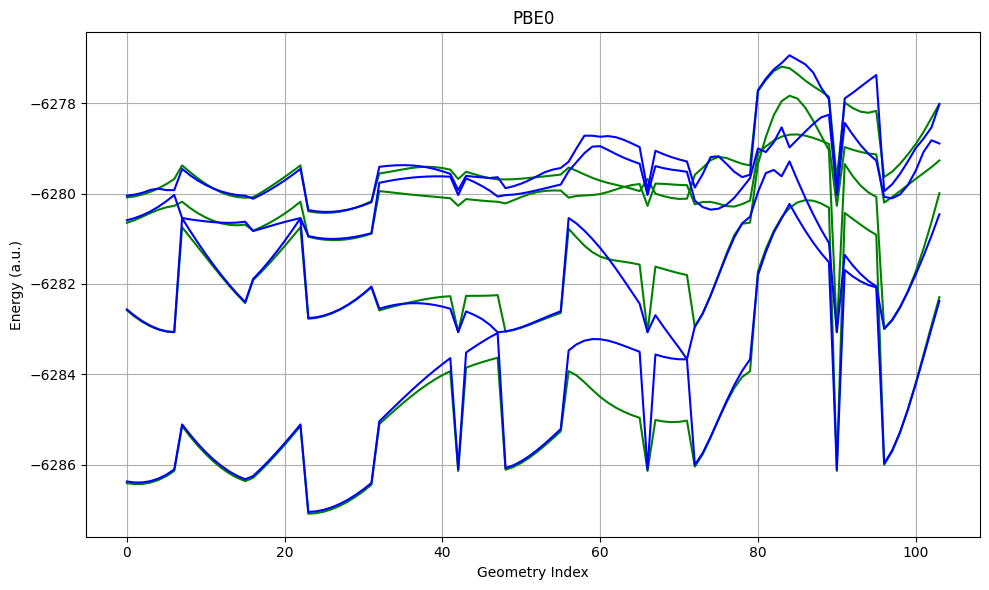

In [3]:
# Plotting Reaction coords Vs MACE prediction
mace_eng = []
for i in range(4):
    dat = f'Outputs/prediction{i}_rxn_PBE0.xyz'
    mace_energies = read_xyz_and_extract_mace_energies(dat)
    mace_eng.append(mace_energies)

all_mace_eng = np.array(mace_eng).T
geometry_indices = range(all_mace_eng.shape[0])
print(geometry_indices)
plt.figure(figsize=(10, 6))
plt.plot(geometry_indices, all_mace_eng, linestyle='-', color='g')
plt.plot(geometry_indices, eng[:,:4], linestyle='-', color='b')
plt.title('PBE0')
plt.xlabel('Geometry Index')
plt.ylabel('Energy (a.u.)')
plt.grid(True)
plt.tight_layout()
plt.show() 
